In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns
from matplotlib import style
from env import get_db_url
style.use('ggplot')

In [3]:
#allows plot to be more easily read
style.use('ggplot')

Exercises
Create a file named seaborn_exercises.py or seaborn_exercises.ipynb for this exercise.

Use the iris database to answer the following quesitons:


In [4]:
iris = sns.load_dataset('iris')

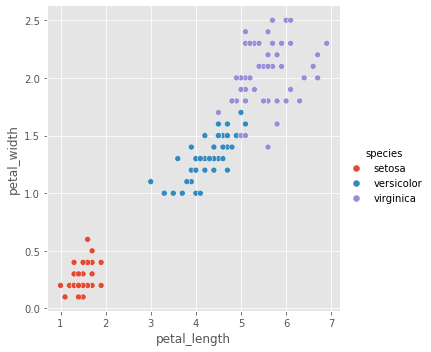

In [5]:
sns.relplot(x='petal_length', y = 'petal_width', data = iris, hue = 'species')


What does the distribution of petal lengths look like?


In [6]:
# the distribution looks as such because there is a large size difference between 'setosa' and the other two species

Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.


In [7]:
iris.corr()
# a strong correlation which is visible on the graph above and in the corr table below

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.


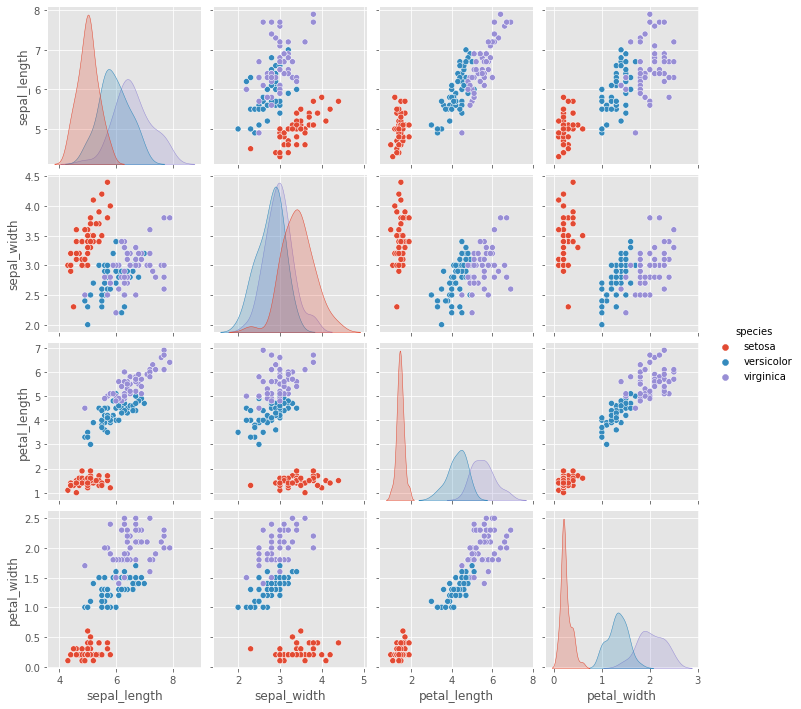

In [8]:
sns.pairplot(data = iris, hue = 'species')

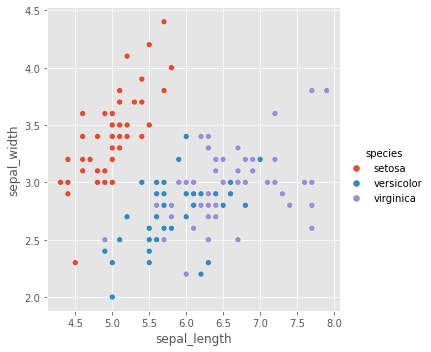

In [9]:
sns.relplot(x='sepal_length', y = 'sepal_width', data = iris, hue = 'species')
#probably not unless you are trying to determine wether or not its 'setosa' but petal length/width is a far better predictor

Which features would be best used to predict species?


In [10]:
# petal width and height are best

Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?


In [11]:
anscombe = sns.load_dataset('anscombe')

In [12]:
anscombe.groupby('dataset').describe()
# dataset I II III all have the same x info and all share the mean and std with IV, the y means and std are also very similar

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50


Plot the x and y values from the anscombe data. Each dataset should be in a separate column.


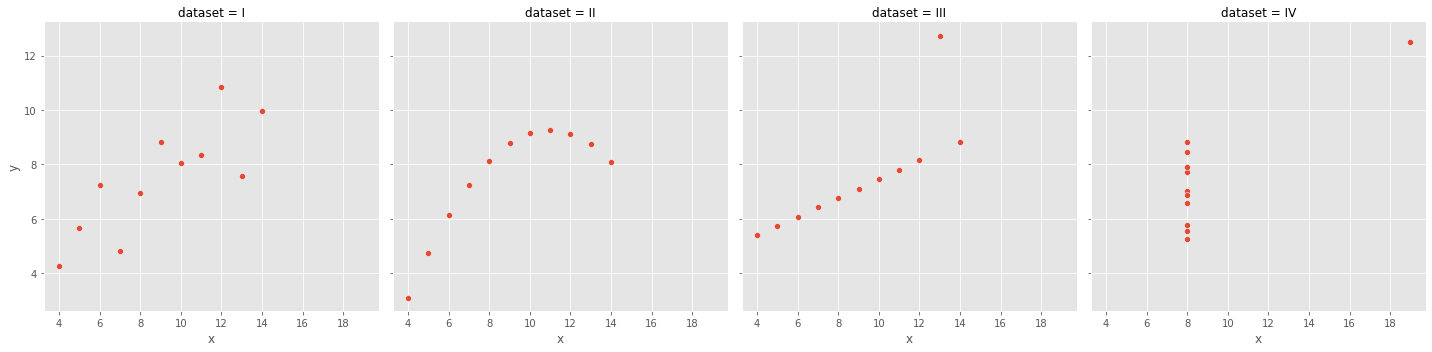

In [13]:
sns.relplot(x='x', y='y', data = anscombe, col = 'dataset')


Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.


In [14]:
insect_sprays = data('InsectSprays')

Text(0.5, 1.0, 'How many bugs alive after each spray')

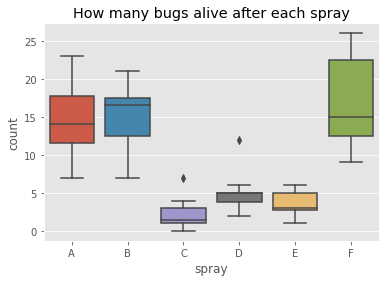

In [15]:
sns.boxplot(data = insect_sprays, y = "count", x = 'spray')
plt.title("How many bugs alive after each spray")


Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:


In [16]:
swiss = data('swiss')
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer


Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)


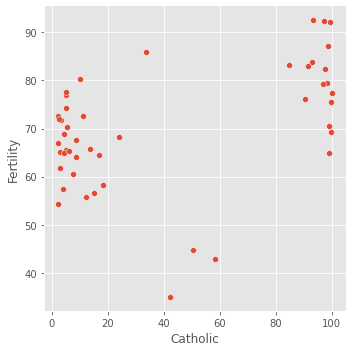

In [17]:
sns.relplot(x='Catholic', y = 'Fertility', data = swiss)

In [18]:
# cut off 80% becuase that shows major affilation
swiss['is_catholic'] = swiss.Catholic > 80

Does whether or not a province is Catholic influence fertility?


<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

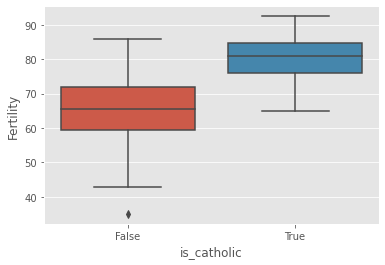

In [19]:
sns.boxplot(x="is_catholic", y ='Fertility', data = swiss)
#it appears to

What measure correlates most strongly with fertility?


In [20]:
swiss.corr()
# education

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556,0.605023
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859,0.475120
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022,-0.641897
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322,-0.328808
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496,0.957798
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000,0.207544
is_catholic,0.605023,0.475120,-0.641897,-0.328808,0.957798,0.207544,1.000000


Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.


In [21]:
#get the url
chipotle_url = get_db_url('chipotle')
#pull the data
chipotle = pd.read_sql('SELECT * FROM orders', chipotle_url)

#function to clean up format and convert to float
def launder_the_cash(money):
    return float(money.replace('$','').replace(',',''))

#format the data
chipotle.item_price = chipotle.item_price.apply(launder_the_cash)

# pull the top 4 as a series
top_four = chipotle.item_name.value_counts().head(4)

# take the top 4 from the df and sum the item prices
top_four = chipotle[chipotle.item_name.isin(top_four.index)].groupby('item_name').item_price.sum()


In [22]:
top_four = top_four.reset_index()
top_four

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Chips and Guacamole,2201.04
3,Steak Burrito,3851.43


Text(0.5, 1.0, 'Revenue From Top Four Items')

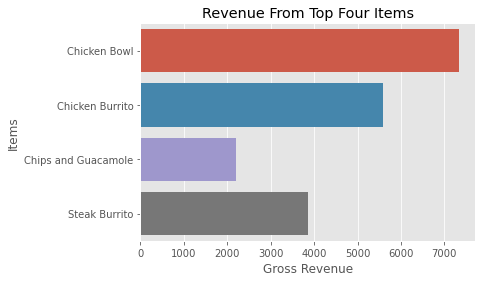

In [23]:
sns.barplot(data = top_four, x = 'item_price', y = 'item_name')
plt.xlabel('Gross Revenue')
plt.ylabel('Items')
plt.title('Revenue From Top Four Items')


Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [24]:
sleepstudy = data('sleepstudy')
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

Text(0.5, 1.0, 'Reaction times')

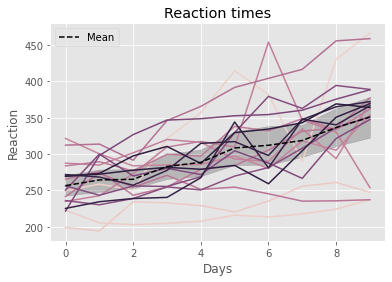

In [26]:
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', hue = 'Subject', legend=False)
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'black', linestyle='--', estimator = 'mean', label = 'Mean')
plt.title('Reaction times')